<a href="https://colab.research.google.com/github/9105507/APRENDIZAJE_AUTOMATICO_23_24/blob/main/AA_PRACTICA3_GRUPO_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Grupo 7**
Miguel Ángel Rojo

Miguel Poyatos García-Lorenzana

Jorge Barcenilla González

Utilizaremos la **biblioteca Python Keras** para aprender a **clasificar** prendas de ropa.

**PROBLEMA:**
- Clasificación de imágenes en escala de grises de números escritos a mano (28 x 28 píxeles) en sus 10 categorías (de 0 a 9)
- Usaremos 60K imágenes de entrenamiento, más de 10K imágenes de prueba todas ellas recopiladas por el National Institute of Standards an Technology (NIST de MNIST) en los años ochenta.
- Este es el "Hola Mundo" del Deep Learning
- El conjunto de datos MNIST está precargado en Keras en la forma de un conjunto de cuatro matrices Numpy
- Algunas muestras

# Inicialización de datos

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)#

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.14.0


In [ ]:
from keras import utils
from keras.utils import to_categorical
import tensorflow as tf

cifar100 = tf.keras.datasets.cifar100
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()

print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

169001437/169001437 [==============================] - 2s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


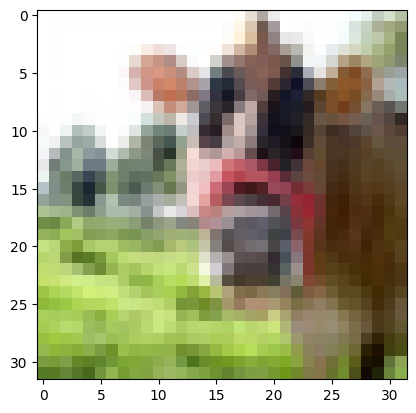

In [ ]:
# Importar el módulo matplotlib
import matplotlib.pyplot as plt

# Supongamos que tienes un array de datos de una imagen
imagen = train_images[0]

# Mostrar la imagen usando imshow()
plt.imshow(imagen)
plt.show()

In [ ]:
import numpy as np

# Lista con las classes
class_names = ["beaver", "dolphin", "otter", "seal", "whale",
               "aquarium fish", "flatfish", "ray", "shark", "trout",
               "orchids", "poppies", "roses", "sunflowers", "tulips",
               "bottles", "bowls", "cans", "cups", "plates",
               "apples", "mushrooms", "oranges", "pears", "sweet peppers",
               "clock", "computer keyboard", "lamp", "telephone", "television",
               "bed", "chair", "couch", "table", "wardrobe",
               "bee", "beetle", "butterfly", "caterpillar", "cockroach",
               "bear", "leopard", "lion", "tiger", "wolf",
               "bridge", "castle", "house", "road", "skyscraper",
               "cloud", "forest", "mountain", "plain", "sea",
               "camel", "cattle", "chimpanzee", "elephant", "kangaroo",
               "fox", "porcupine", "possum", "raccoon", "skunk",
               "crab", "lobster", "snail", "spider", "worm",
               "baby", "boy", "girl", "man", "woman",
               "crocodile", "dinosaur", "lizard", "snake", "turtle",
               "hamster", "mouse", "rabbit", "shrew", "squirrel",
               "maple", "oak", "palm", "pine", "willow",
               "bicycle", "bus", "motorcycle", "pickup truck", "train",
               "lawn-mower", "rocket", "streetcar", "tank", "tractor"]

# Crear una lista con los nombres de las superclases
super_class_names = ["aquatic mammals",
                     "fish",
                     "flowers",
                     "food containers",
                     "fruit and vegetables",
                     "household electrical devices",
                     "household furniture",
                     "insects", "large carnivores",
                     "large man-made outdoor things",
                     "large natural outdoor scenes",
                     "large omnivores and herbivores",
                     "medium-sized mammals",
                     "non-insect invertebrates",
                     "people",
                     "reptiles",
                     "small mammals",
                     "trees",
                     "vehicles 1",
                     "vehicles 2"]

In [ ]:
# Crear un array con los índices de las superclases
train_labels_superclass = np.floor_divide(train_labels, 5)
print(f'El array train_labels_superclass es:\n{train_labels_superclass}')

El array train_labels_superclass es:
[[ 3]
 [ 5]
 [ 0]
 ...
 [ 0]
 [ 1]
 [14]]


In [ ]:
import numpy as np
from collections import Counter

train_labels = train_labels.reshape(50000)

# Create a counter for the indices
index_count = Counter(train_labels)

# Sort the indices
sorted_indices = sorted(index_count.items())

# Print the count of each index and the corresponding class name
for index, count in sorted_indices:
    print(f'{class_names[index]}: {count}')

beaver: 500
dolphin: 500
otter: 500
seal: 500
whale: 500
aquarium fish: 500
flatfish: 500
ray: 500
shark: 500
trout: 500
orchids: 500
poppies: 500
roses: 500
sunflowers: 500
tulips: 500
bottles: 500
bowls: 500
cans: 500
cups: 500
plates: 500
apples: 500
mushrooms: 500
oranges: 500
pears: 500
sweet peppers: 500
clock: 500
computer keyboard: 500
lamp: 500
telephone: 500
television: 500
bed: 500
chair: 500
couch: 500
table: 500
wardrobe: 500
bee: 500
beetle: 500
butterfly: 500
caterpillar: 500
cockroach: 500
bear: 500
leopard: 500
lion: 500
tiger: 500
wolf: 500
bridge: 500
castle: 500
house: 500
road: 500
skyscraper: 500
cloud: 500
forest: 500
mountain: 500
plain: 500
sea: 500
camel: 500
cattle: 500
chimpanzee: 500
elephant: 500
kangaroo: 500
fox: 500
porcupine: 500
possum: 500
raccoon: 500
skunk: 500
crab: 500
lobster: 500
snail: 500
spider: 500
worm: 500
baby: 500
boy: 500
girl: 500
man: 500
woman: 500
crocodile: 500
dinosaur: 500
lizard: 500
snake: 500
turtle: 500
hamster: 500
mouse: 5

In [ ]:
import numpy as np
from collections import Counter

train_labels_superclass = train_labels_superclass.reshape(50000)

# Create a counter for the indices
index_count = Counter(train_labels_superclass)

# Sort the indices
sorted_indices = sorted(index_count.items())

# Print the count of each index and the corresponding class name
for index, count in sorted_indices:
    print(f'{super_class_names[index]}: {count}')

aquatic mammals: 2500
fish: 2500
flowers: 2500
food containers: 2500
fruit and vegetables: 2500
household electrical devices: 2500
household furniture: 2500
insects: 2500
large carnivores: 2500
large man-made outdoor things: 2500
large natural outdoor scenes: 2500
large omnivores and herbivores: 2500
medium-sized mammals: 2500
non-insect invertebrates: 2500
people: 2500
reptiles: 2500
small mammals: 2500
trees: 2500
vehicles 1: 2500
vehicles 2: 2500


# VISUALIZAR

In [ ]:
train_labels.shape

(50000, 1)

Echamos un vistazo a los **datos de entrenamiento**:

In [ ]:
len(train_labels)

50000

In [ ]:
train_labels

array([[19],
       [29],
       [ 0],
       ...,
       [ 3],
       [ 7],
       [73]])

In [ ]:
print(train_images.shape)

(50000, 32, 32, 3)


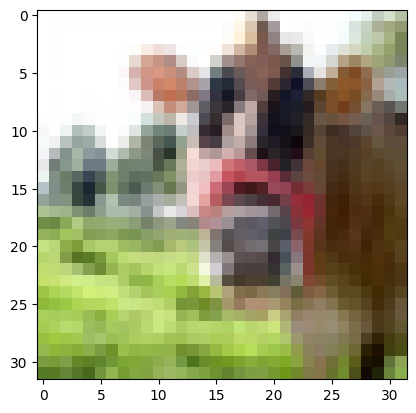

In [ ]:
# Veamos el elemento 0 (que vemos que es un dinosaurio) y pintémoslo con matplotlib
digit = train_images[0]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [ ]:
# La matriz de rojos
red_matrix = np.take(digit, 0, axis=2)


# Vemos la matriz de la imagen número 30.000 (28x28)
np.set_printoptions(precision=2, suppress=True, linewidth=145)
print(np.matrix(red_matrix))

[[255 253 253 ... 253 253 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 253 253 ... 253 253 255]]


In [ ]:
# La imagen anterior corresponde con el número 3. Hasta se puede intuir....
class_names[train_labels[30000][0]]

'cockroach'

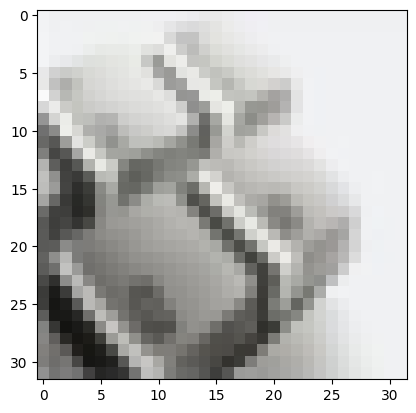

In [ ]:
# Veamos el elemento 30000 y pintémoslo con matplotlib
digit = train_images[30000]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

Los **datos de prueba**:

In [ ]:
test_images.shape

(10000, 32, 32, 3)

In [ ]:
len(test_labels)

In [ ]:
# Veamos el elemento 0 de test (que vemos que es un t) y pintémoslo con matplotlib
digit = test_images[0]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [ ]:
train_labels

# MODELO

In [ ]:
# Convertir las etiquetas a codificación one-hot
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten


model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 10, 10, 64)        51264     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 1600)              0         
                                                                 
 dense_4 (Dense)             (None, 100)              

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(train_images, train_labels,
          batch_size=500,
          epochs=5,
          verbose=1)

test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

Epoch 1/5
100/100 [==============================] - 84s 834ms/step - loss: 6.6393 - accuracy: 0.0171
Epoch 2/5
100/100 [==============================] - 87s 873ms/step - loss: 4.5814 - accuracy: 0.0258
Epoch 3/5
100/100 [==============================] - 83s 831ms/step - loss: 4.5105 - accuracy: 0.0382
Epoch 4/5
100/100 [==============================] - 82s 824ms/step - loss: 4.4504 - accuracy: 0.0504
Epoch 5/5
313/313 [==============================] - 5s 16ms/step - loss: 4.4424 - accuracy: 0.0499
Test accuracy: 0.04989999905228615


## Multiples casos

In [ ]:
# casos = {
#     1: {'Neuronas_capa_1': 10, 'Función de activación': 'relu', 'Optimizador': 'sgd'},
#     2: {'Neuronas_capa_1': 10, 'Función de activación': 'relu', 'Optimizador': 'rmsprop'},
#     3: {'Neuronas_capa_1': 10, 'Función de activación': 'sigmoid', 'Optimizador': 'sgd'},
#     4: {'Neuronas_capa_1': 10, 'Función de activación': 'sigmoid', 'Optimizador': 'rmsprop'},
#     5: {'Neuronas_capa_1': 512, 'Función de activación': 'relu', 'Optimizador': 'sgd'},
#     6: {'Neuronas_capa_1': 512, 'Función de activación': 'relu', 'Optimizador': 'rmsprop'},
#     7: {'Neuronas_capa_1': 512, 'Función de activación': 'sigmoid', 'Optimizador': 'sgd'},
#     8: {'Neuronas_capa_1': 512, 'Función de activación': 'sigmoid', 'Optimizador': 'rmsprop'}
# }

# train_images = train_images.reshape((60000, 28 * 28))
# train_images = train_images.astype('float32') / 255
# test_images = test_images.reshape((10000, 28 * 28))
# test_images = test_images.astype('float32') / 255

# train_labels = to_categorical(train_labels)
# test_labels = to_categorical(test_labels)

# modelos = []

# for i in range(1,9):
#     network = models.Sequential()

#     print("\n\n=======================================================================")
#     print("CASO ", i)
#     print("=======================================================================")

#     # DATOS DEL CASO
#     n_neuronas = casos[i]['Neuronas_capa_1']
#     f_activacion = casos[i]['Función de activación']
#     optimizador = casos[i]['Optimizador']

#     print("\nCaracterísticas del caso:")
#     print(f" - Número de neuronas en la capa 1: {n_neuronas}")
#     print(f" - Función de activación: {f_activacion}")
#     print(f" - Optimizador: {optimizador}")

#     # MODELO:
#     network.add(layers.Dense(n_neuronas, activation=f_activacion, input_shape=(28*28,)))
#     network.add(layers.Dense(10, activation='softmax'))

#     print("\nSUMMARY")
#     network.summary()

#     network.compile(optimizer=optimizador, loss='categorical_crossentropy', metrics=['accuracy'])

#     print("\nENTRENAMIENTO:")
#     network.fit(train_images, train_labels, epochs=5, batch_size=128)

#     modelos.append(network)

#     print("\nVALIDACIÓN:")
#     test_loss, test_acc = network.evaluate(test_images, test_labels)

#     print('\ntest_loss:', test_loss)
#     print('test_acc:', test_acc)

## Graficas rendimiento

In [ ]:
def evaluar_rendimiento(train_loss, train_acc, val_loss, val_acc):
    # Configuración de la figura para las gráficas
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))

    # Gráfica de pérdida
    axs[0].plot(range(1, len(train_loss) + 1), train_loss, label='Pérdida de entrenamiento')
    axs[0].plot(range(1, len(val_loss) + 1), val_loss, label='Pérdida de validación')
    axs[0].set_xlabel('Época')
    axs[0].set_ylabel('Pérdida')
    axs[0].legend()
    axs[0].set_title('Gráfica de Pérdida')

    # Gráfica de precisión
    axs[1].plot(range(1, len(train_acc) + 1), train_acc, label='Precisión de entrenamiento')
    axs[1].plot(range(1, len(val_acc) + 1), val_acc, label='Precisión de validación')
    axs[1].set_xlabel('Época')
    axs[1].set_ylabel('Precisión')
    axs[1].legend()
    axs[1].set_title('Gráfica de Precisión')

    plt.show()

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

print('Comprobamos la forma de las imagenes:')
print(train_images.shape)

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
print('Comprobamos la forma de las etiquetas:')
print(train_labels.shape)

In [ ]:
train_labels

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print('Comprobamos la forma de las imagenes:')
print(train_images.shape)

print('Comprobamos la forma de las etiquetas:')
print(train_labels.shape)

network = models.Sequential()
network.add(layers.Dense(10, "relu", input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenamiento de la red neuronal
history = network.fit(train_images, train_labels, epochs=5, batch_size=128, validation_data=(test_images, test_labels))

# Los valores de pérdida y precisión en cada época se guardan en el atributo history
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

evaluar_rendimiento(train_loss,train_acc,val_loss,val_acc)

plt.show()

# PREDICCIONES

In [ ]:
# Veamos el elemento 12 de test y pintémoslo con matplotlib
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
import matplotlib.pyplot as plt
digit = test_images[11]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

from keras import utils
from keras.utils import to_categorical
# from keras.utils.np_utils import to_categorical

print("=VEMOS LAS ETIQUETAS DE TEST ORIGINALES================================")
print(test_labels)
print("=======================================================================")
test_labels = to_categorical(test_labels)
print("=VEMOS LAS ETIQUETAS DE TEST AL PASARLAS POR to_categorical============")
print(test_labels)
print("=======================================================================")

# Hacemos las predicciones con las imágenes de Test
predictions = network.predict(test_images)

print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 12 (QUE DEBERÍA SER UN 6)============")
print(predictions[11])
print("=======================================================================")
print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 12 (QUE DEBERÍA SER UN 6)============")
print(np.argmax(predictions[11]))
print("=======================================================================")
print("=LA SUMA DE TODAS LAS PREDICCIONES PARA EL ELEMENTO 12 DEBERÍA SER 1===")
print(np.sum(predictions[11]))
print("=======================================================================")
print("=PINTAMOS TODAS LAS PREDICCIONES=======================================")
print(predictions)

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if np.max(predicted_label) == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel("{}[{:1.0f}] {:2.0f}% \n({}[{:1.0f}])".format(class_names[predicted_label],
                                predicted_label,
                                100*np.max(predictions_array),
                                class_names[true_label],
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])

  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  if predicted_label == true_label:
     thisplot[predicted_label].set_color('green')
  else:
     thisplot[predicted_label].set_color('red')

In [ ]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

predictions = network.predict(test_images)

for i in range(20):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i],  test_labels)
  plt.show()
  plt.clf()

# TEST

In [ ]:
# 8.- VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
test_loss, test_acc = network.evaluate(test_images, test_labels)
# HEMOS UTILIZADO MENOS DE 20 LÍNEAS DE CÓDIGO...

In [ ]:
# Look at confusion matrix
# Note, this code is taken straight from the SKLEARN website, an nice way of
# viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

In [ ]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np

# Predicción de valores desde el dataset de validación
Y_pred = network.predict(test_images)
print("=VALORES QUE PREDICE EL MODELO ENTRENADO CON LAS IMAGENES DE TEST======")
print("=RECORDAR QUE LA PRIMERA IMAGEN DE TEST ERA UN 7=======================")
print(Y_pred[0])
print("=======================================================================")
# Convertir en predicciones de clases desde los vectores one-hot encoding
Y_pred_classes = np.argmax(Y_pred, axis = 1)
print("=CONVERSION DE PREDICCIONES EN CLASES DESDE VECTORES ONE-HOT ENCODING==")
print(Y_pred_classes)
print("=======================================================================")
# Convertir en clases de observación desde los vectores one-hot encoding
Y_true = test_labels  # Aquí se ha cambiado 'np.argmax(test_labels)' por 'test_labels'
print("=CONVERSION DE VALORES REALES EN CLASES DESDE VECTORES ONE-HOT ENCODING")
print(Y_true)
print("=======================================================================")
# Computar la matriz de confusión
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
print("=MATRIZ DE CONFUSION CON VALORES REALES FRENTE A LOS PREDICHOS=========")
print(confusion_mtx)
print("=======================================================================")
# Dibujar la matriz de confusión
print("=PINTAMOS LA MATRIZ DE CONFUSION=======================================")
plot_confusion_matrix(confusion_mtx, classes = range(10))